<a href="https://colab.research.google.com/github/tripham-ltp001k50/A.I-homework/blob/main/A_I_Homework_(Tr%C3%AD_LTP001).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.3 MB/s eta 0:00:00


Nguy cơ tiểu đường: 75.00000000000001


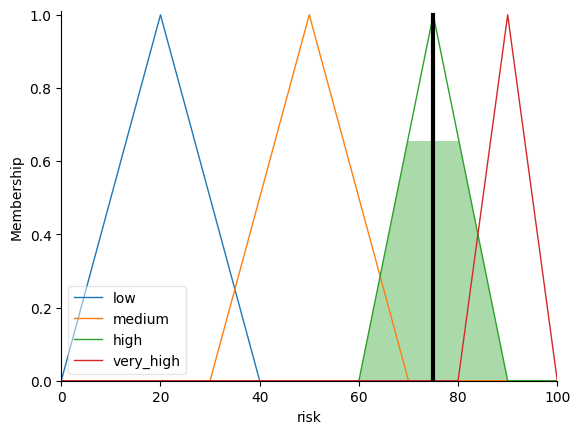

In [2]:
#bài2.2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

bloodsugarlevel = ctrl.Antecedent(np.arange(50, 301, 1), 'bloodsugarlevel')
bodymassindex = ctrl.Antecedent(np.arange(10, 41, 0.1), 'bodymassindex')
frequenturination = ctrl.Antecedent(np.arange(0, 11, 1), 'frequenturination')
fatiguelevel = ctrl.Antecedent(np.arange(0, 11, 1), 'fatiguelevel')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

bloodsugarlevel['low'] = fuzz.trimf(bloodsugarlevel.universe, [50, 80, 120])
bloodsugarlevel['normal'] = fuzz.trimf(bloodsugarlevel.universe, [80, 120, 200])
bloodsugarlevel['high'] = fuzz.trimf(bloodsugarlevel.universe, [120, 200, 250])
bloodsugarlevel['very_high'] = fuzz.trimf(bloodsugarlevel.universe, [200, 250, 300])

bodymassindex['underweight'] = fuzz.trimf(bodymassindex.universe, [10, 15, 18.5])
bodymassindex['normal'] = fuzz.trimf(bodymassindex.universe, [18.5, 22, 24.9])
bodymassindex['overweight'] = fuzz.trimf(bodymassindex.universe, [25, 27, 29.9])
bodymassindex['obese'] = fuzz.trimf(bodymassindex.universe, [30, 35, 40])

frequenturination['rarely'] = fuzz.trimf(frequenturination.universe, [0, 2, 4])
frequenturination['sometimes'] = fuzz.trimf(frequenturination.universe, [3, 5, 7])
frequenturination['often'] = fuzz.trimf(frequenturination.universe, [6, 9, 10])

fatiguelevel['low'] = fuzz.trimf(fatiguelevel.universe, [0, 2, 4])
fatiguelevel['moderate'] = fuzz.trimf(fatiguelevel.universe, [3, 5, 7])
fatiguelevel['high'] = fuzz.trimf(fatiguelevel.universe, [6, 9, 10])


risk['low'] = fuzz.trimf(risk.universe, [0, 20, 40])
risk['medium'] = fuzz.trimf(risk.universe, [30, 50, 70])
risk['high'] = fuzz.trimf(risk.universe, [60, 75, 90])
risk['very_high'] = fuzz.trimf(risk.universe, [80, 90, 100])

rule1 = ctrl.Rule(bloodsugarlevel['very_high'] & frequenturination['often'], risk['very_high'])
rule2 = ctrl.Rule(bloodsugarlevel['very_high'] & frequenturination['sometimes'], risk['high'])
rule3 = ctrl.Rule(bloodsugarlevel['high'] & frequenturination['often'], risk['high'])
rule4 = ctrl.Rule(bloodsugarlevel['normal'] & frequenturination['rarely'], risk['low'])
rule5 = ctrl.Rule(bloodsugarlevel['very_high'] & bodymassindex['obese'], risk['very_high'])
rule6 = ctrl.Rule(bloodsugarlevel['very_high'] & bodymassindex['overweight'], risk['high'])
rule7 = ctrl.Rule(bloodsugarlevel['high'] & bodymassindex['overweight'], risk['high'])
rule8 = ctrl.Rule(bloodsugarlevel['high'] & bodymassindex['normal'], risk['medium'])
rule9 = ctrl.Rule(bloodsugarlevel['normal'] & bodymassindex['normal'], risk['low'])
rule10 = ctrl.Rule(bloodsugarlevel['very_high'] & fatiguelevel['high'], risk['very_high'])
rule11 = ctrl.Rule(bloodsugarlevel['high'] & fatiguelevel['high'], risk['high'])
rule12 = ctrl.Rule(bloodsugarlevel['high'] & fatiguelevel['moderate'], risk['medium'])
rule13 = ctrl.Rule(bloodsugarlevel['normal'] & fatiguelevel['low'], risk['low'])


risking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
risking = ctrl.ControlSystemSimulation(risking_ctrl)

risking.input['bloodsugarlevel'] = 180
risking.input['bodymassindex'] = 28
risking.input['frequenturination'] = 6
risking.input['fatiguelevel'] = 7

risking.compute()


risk.view(sim=risking)
print("Nguy cơ tiểu đường:", risking.output['risk'])



7.096446700507616


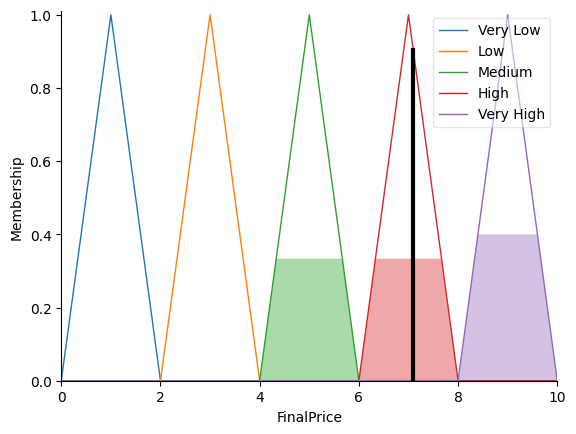

In [3]:
#bài 2.3
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

Demand = ctrl.Antecedent(np.arange(0, 11, 1), 'Demand')
CompetitorPricing = ctrl.Antecedent(np.arange(0, 11, 1), 'CompetitorPricing')
ProductionCost = ctrl.Antecedent(np.arange(0, 11, 1), 'ProductionCost')
Seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'Seasonality')
StockLevel = ctrl.Antecedent(np.arange(0, 11, 1), 'StockLevel')
FinalPrice = ctrl.Consequent(np.arange(0, 11, 1), 'FinalPrice')

Demand['low'] = fuzz.trimf(Demand.universe, [0, 0, 5])
Demand['medium'] = fuzz.trimf(Demand.universe, [2, 5, 8])
Demand['high'] = fuzz.trimf(Demand.universe, [5, 10, 10])

CompetitorPricing['low'] = fuzz.trimf(CompetitorPricing.universe, [0, 0, 5])
CompetitorPricing['medium'] = fuzz.trimf(CompetitorPricing.universe, [2, 5, 8])
CompetitorPricing['high'] = fuzz.trimf(CompetitorPricing.universe, [5, 10, 10])

ProductionCost['low'] = fuzz.trimf(ProductionCost.universe, [0, 0, 5])
ProductionCost['medium'] = fuzz.trimf(ProductionCost.universe, [2, 5, 8])
ProductionCost['high'] = fuzz.trimf(ProductionCost.universe, [5, 10, 10])

Seasonality['offpeak'] = fuzz.trimf(Seasonality.universe, [0, 0, 5])
Seasonality['normal'] = fuzz.trimf(Seasonality.universe, [2, 5, 8])
Seasonality['peak'] = fuzz.trimf(Seasonality.universe, [5, 10, 10])

StockLevel['low'] = fuzz.trimf(StockLevel.universe, [0, 0, 5])
StockLevel['medium'] = fuzz.trimf(StockLevel.universe, [2, 5, 8])
StockLevel['high'] = fuzz.trimf(StockLevel.universe, [5, 10, 10])


FinalPrice['Very Low'] = fuzz.trimf(FinalPrice.universe, [0, 1, 2])
FinalPrice['Low'] = fuzz.trimf(FinalPrice.universe, [2,3,4])
FinalPrice['Medium'] = fuzz.trimf(FinalPrice.universe, [4,5,6])
FinalPrice['High'] = fuzz.trimf(FinalPrice.universe, [6,7,8])
FinalPrice['Very High'] = fuzz.trimf(FinalPrice.universe, [8,9,10])

rule1 = ctrl.Rule(Demand['high'] & CompetitorPricing['high'] & StockLevel['low'], FinalPrice['Very High'])
rule2 = ctrl.Rule(Demand['high'] & Seasonality['peak'] & StockLevel['low'], FinalPrice['Very High'])
rule3 = ctrl.Rule(Demand['medium'] & ProductionCost['high'] & StockLevel['low'], FinalPrice['Very High'])

rule4 = ctrl.Rule(Demand['high'] & CompetitorPricing['medium'] & StockLevel['medium'], FinalPrice['High'])
rule5 = ctrl.Rule(Demand['medium'] & CompetitorPricing['high'] & StockLevel['low'], FinalPrice['High'])
rule6 = ctrl.Rule(Demand['medium'] & CompetitorPricing['high'] & StockLevel['low'], FinalPrice['High'])
rule7 = ctrl.Rule(Demand['high'] &  Seasonality['peak'] & StockLevel['medium'], FinalPrice['High'])

rule8 = ctrl.Rule(Demand['medium'] & CompetitorPricing['medium'] & StockLevel['medium'], FinalPrice['Medium'])
rule9 = ctrl.Rule(Demand['low'] & CompetitorPricing['high'] & StockLevel['medium'], FinalPrice['Medium'])
rule10 = ctrl.Rule(Demand['medium'] & ProductionCost['medium'] & StockLevel['medium'], FinalPrice['Medium'])

rule11 = ctrl.Rule(Demand['low'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['Very Low'])
rule12 = ctrl.Rule(Demand['medium'] &ProductionCost['low']& StockLevel['high'], FinalPrice['Low'])
rule13 = ctrl.Rule(Demand['low'] & Seasonality['offpeak'] & StockLevel['high'], FinalPrice['Low'])

rule14 = ctrl.Rule(Demand['low'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['Very Low'])
rule15 = ctrl.Rule(Demand['low'] & Seasonality['offpeak'] & StockLevel['high'], FinalPrice['Very Low'])
rule16 = ctrl.Rule(Demand['medium'] & CompetitorPricing['low'] & StockLevel['high'], FinalPrice['Very Low'])
rule17 = ctrl.Rule(Demand['medium'] &  CompetitorPricing['low'] & StockLevel['high'], FinalPrice['Very Low'])

pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17])
pricing = ctrl.ControlSystemSimulation(pricing_ctrl)

pricing.input['Demand'] = 7
pricing.input['CompetitorPricing'] = 5
pricing.input['ProductionCost'] = 6
pricing.input['Seasonality'] = 8
pricing.input['StockLevel'] = 3

pricing.compute()

print(pricing.output['FinalPrice'])
FinalPrice.view(sim=pricing)

Wash Time: 6.329120589784097
Water Level: 5.533333333333333


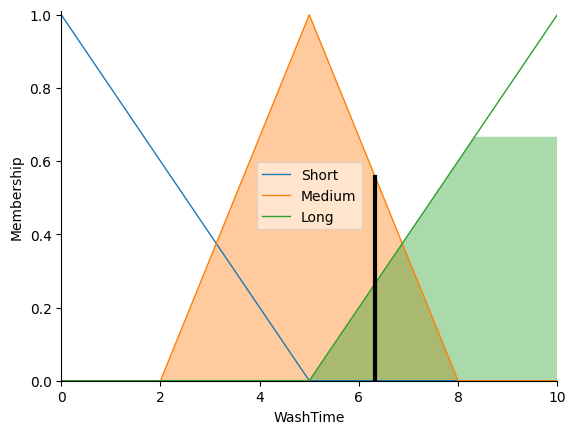

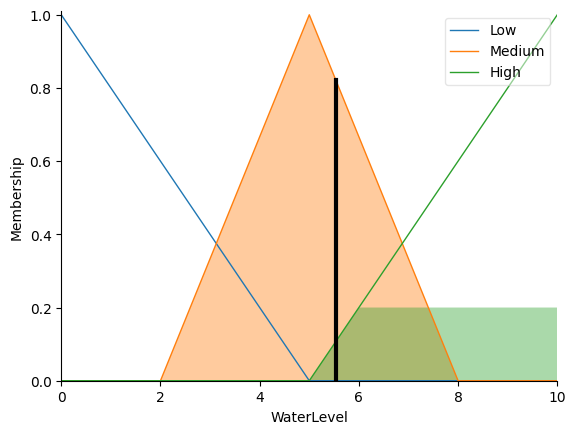

In [4]:
#bài2.4
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

Load = ctrl.Antecedent(np.arange(0, 11, 1), 'Load')
DirtLevel = ctrl.Antecedent(np.arange(0, 11, 1), 'DirtLevel')
FabricType = ctrl.Antecedent(np.arange(0, 11, 1), 'FabricType')
WashTime = ctrl.Consequent(np.arange(0, 11, 1), 'WashTime')
WaterLevel = ctrl.Consequent(np.arange(0, 11, 1), 'WaterLevel')

Load['Small'] = fuzz.trimf(Load.universe, [0, 0, 5])
Load['Medium'] = fuzz.trimf(Load.universe, [2, 5, 8])
Load['Large'] = fuzz.trimf(Load.universe, [5, 10, 10])

DirtLevel['Low'] = fuzz.trimf(DirtLevel.universe, [0, 0, 5])
DirtLevel['Medium'] = fuzz.trimf(DirtLevel.universe, [2, 5, 8])
DirtLevel['High'] = fuzz.trimf(DirtLevel.universe, [5, 10, 10])

FabricType['Delicate'] = fuzz.trimf(FabricType.universe, [0, 0, 5])
FabricType['Normal'] = fuzz.trimf(FabricType.universe, [2, 5, 8])
FabricType['Heavy'] = fuzz.trimf(FabricType.universe, [5, 10, 10])


WashTime['Short'] = fuzz.trimf(WashTime.universe, [0, 0, 5])
WashTime['Medium'] = fuzz.trimf(WashTime.universe, [2, 5, 8])
WashTime['Long'] = fuzz.trimf(WashTime.universe, [5, 10, 10])

WaterLevel['Low'] = fuzz.trimf(WaterLevel.universe, [0, 0, 5])
WaterLevel['Medium'] = fuzz.trimf(WaterLevel.universe, [2, 5, 8])
WaterLevel['High'] = fuzz.trimf(WaterLevel.universe, [5, 10, 10])

rules = [
    ctrl.Rule(Load['Small'] & DirtLevel['Low'], (WashTime['Short'], WaterLevel['Low'])),
    ctrl.Rule(Load['Small'] & DirtLevel['Medium'], (WashTime['Medium'], WaterLevel['Medium'])),
    ctrl.Rule(Load['Small'] & DirtLevel['High'], (WashTime['Long'], WaterLevel['Medium'])),
    ctrl.Rule(Load['Medium'] & DirtLevel['Low'], (WashTime['Medium'], WaterLevel['Medium'])),
    ctrl.Rule(Load['Medium'] & DirtLevel['Medium'], (WashTime['Long'], WaterLevel['Medium'])),
    ctrl.Rule(Load['Medium'] & DirtLevel['High'], (WashTime['Long'], WaterLevel['High'])),
    ctrl.Rule(Load['Large'] & DirtLevel['Low'], (WashTime['Medium'], WaterLevel['High'])),
    ctrl.Rule(Load['Large'] & DirtLevel['Medium'], (WashTime['Long'], WaterLevel['High'])),
    ctrl.Rule(Load['Large'] & DirtLevel['High'], (WashTime['Long'], WaterLevel['High'])),
    ctrl.Rule(FabricType['Delicate'], (WashTime['Short'], WaterLevel['Low'])),
    ctrl.Rule(FabricType['Normal'], (WashTime['Medium'], WaterLevel['Medium'])),
    ctrl.Rule(FabricType['Heavy'], (WashTime['Long'], WaterLevel['High'])),
    ctrl.Rule(Load['Large'] & DirtLevel['High'] & FabricType['Heavy'], (WashTime['Long'], WaterLevel['High'])),
    ctrl.Rule(Load['Small'] & DirtLevel['Low'] & FabricType['Delicate'], (WashTime['Short'], WaterLevel['Low'])),
    ctrl.Rule(Load['Medium'] & DirtLevel['Medium'] & FabricType['Normal'], (WashTime['Medium'], WaterLevel['Medium']))
]

washing_ctrl = ctrl.ControlSystem(rules)
washing = ctrl.ControlSystemSimulation(washing_ctrl)

washing.input['Load'] = 6
washing.input['DirtLevel'] = 4
washing.input['FabricType'] = 5

washing.compute()

print(f"Wash Time: {washing.output['WashTime']}")
print(f"Water Level: {washing.output['WaterLevel']}")

WashTime.view(sim=washing)
WaterLevel.view(sim=washing)



Fan Speed: 6.25%
Cooling Level: 6.40%


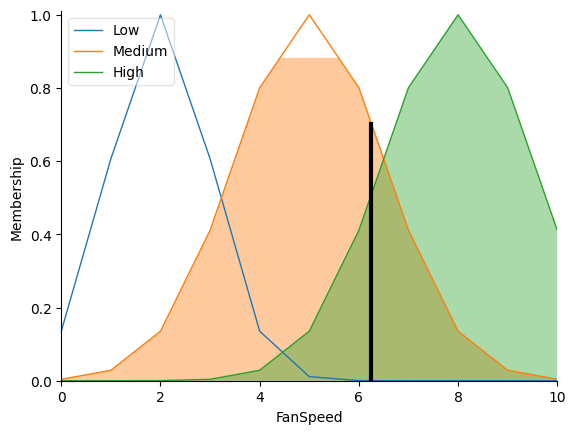

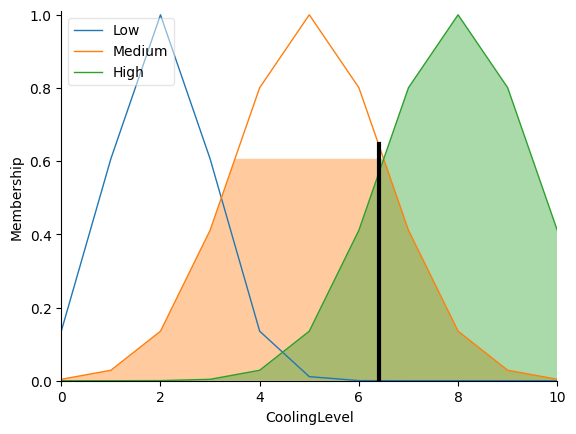

In [8]:
#bài2.5
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

Temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'Temperature')
Humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'Humidity')
People = ctrl.Antecedent(np.arange(0, 11, 1), 'People')

FanSpeed = ctrl.Consequent(np.arange(0, 11, 1), 'FanSpeed')
CoolingLevel = ctrl.Consequent(np.arange(0, 11, 1), 'CoolingLevel')

Temperature['Cold'] = fuzz.gaussmf(Temperature.universe, 5, 3)
Temperature['Cool'] = fuzz.gaussmf(Temperature.universe, 15, 4)
Temperature['Comfortable'] = fuzz.gaussmf(Temperature.universe, 25, 5)
Temperature['Warm'] = fuzz.gaussmf(Temperature.universe, 30, 4)
Temperature['Hot'] = fuzz.gaussmf(Temperature.universe, 35, 3)

Humidity['Low'] = fuzz.gaussmf(Humidity.universe, 20, 10)
Humidity['Medium'] = fuzz.gaussmf(Humidity.universe, 50, 15)
Humidity['High'] = fuzz.gaussmf(Humidity.universe, 80, 10)

People['Few'] = fuzz.gaussmf(People.universe, 2, 1)
People['Moderate'] = fuzz.gaussmf(People.universe, 5, 2)
People['Many'] = fuzz.gaussmf(People.universe, 8, 2)

FanSpeed['Low'] = fuzz.gaussmf(FanSpeed.universe, 2, 1)
FanSpeed['Medium'] = fuzz.gaussmf(FanSpeed.universe, 5, 1.5)
FanSpeed['High'] = fuzz.gaussmf(FanSpeed.universe, 8, 1.5)

CoolingLevel['Low'] = fuzz.gaussmf(CoolingLevel.universe, 2, 1)
CoolingLevel['Medium'] = fuzz.gaussmf(CoolingLevel.universe, 5, 1.5)
CoolingLevel['High'] = fuzz.gaussmf(CoolingLevel.universe, 8, 1.5)

rule1 = ctrl.Rule(Temperature['Cold'], FanSpeed['Low'])
rule2 = ctrl.Rule(Temperature['Cool'], FanSpeed['Low'])
rule3 = ctrl.Rule(Temperature['Comfortable'], FanSpeed['Medium'])
rule4 = ctrl.Rule(Temperature['Warm'], FanSpeed['High'])
rule5 = ctrl.Rule(Temperature['Hot'], FanSpeed['High'])

rule6 = ctrl.Rule(Temperature['Cold'], CoolingLevel['Low'])
rule7 = ctrl.Rule(Temperature['Cool'], CoolingLevel['Low'])
rule8 = ctrl.Rule(Temperature['Comfortable'], CoolingLevel['Medium'])
rule9 = ctrl.Rule(Temperature['Warm'], CoolingLevel['High'])
rule10 = ctrl.Rule(Temperature['Hot'], CoolingLevel['High'])

rule11 = ctrl.Rule(Humidity['Medium'], CoolingLevel['Medium'])
rule12 = ctrl.Rule(Humidity['High'], CoolingLevel['High'])

rule13 = ctrl.Rule(People['Few'], FanSpeed['Low'])
rule14 = ctrl.Rule(People['Moderate'], FanSpeed['Medium'])
rule15 = ctrl.Rule(People['Many'], FanSpeed['High'])

rule16 = ctrl.Rule(Temperature['Hot'] & Humidity['High'] & People['Many'], CoolingLevel['High'], FanSpeed['High'])
rule17 = ctrl.Rule(Temperature['Comfortable'] & Humidity['Medium'] & People['Moderate'], CoolingLevel['Medium'], FanSpeed['Medium'])
rule18 = ctrl.Rule(Temperature['Cool'] & Humidity['Low'] & People['Few'], CoolingLevel['Low'], FanSpeed['Low'])

ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12,
                              rule13, rule14, rule15, rule16, rule17, rule18])
ac_simulation = ctrl.ControlSystemSimulation(ac_ctrl)

ac_simulation.input['Temperature'] = 30
ac_simulation.input['Humidity'] = 70
ac_simulation.input['People'] = 6

ac_simulation.compute()

print(f"Fan Speed: {ac_simulation.output['FanSpeed']:.2f}%")
print(f"Cooling Level: {ac_simulation.output['CoolingLevel']:.2f}%")

FanSpeed.view(sim=ac_simulation)
CoolingLevel.view(sim=ac_simulation)


Cooking Time: 6.54
Power Level: 5.73


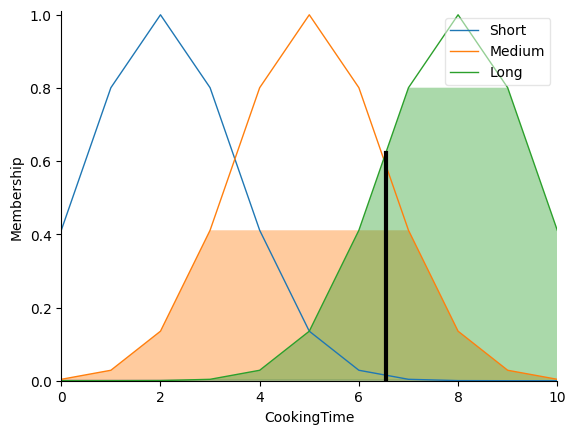

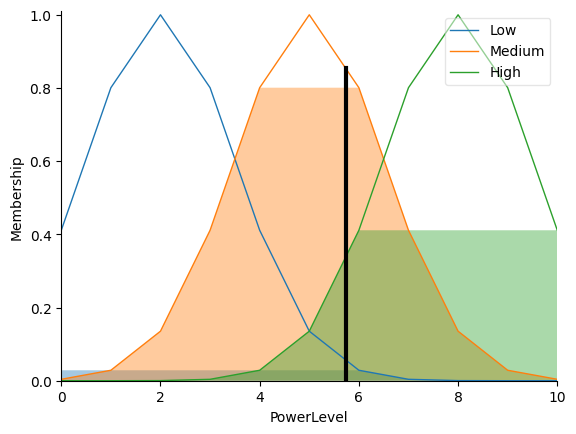

In [6]:
#bài2.6
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

FoodWeight = ctrl.Antecedent(np.arange(0, 11, 1), 'FoodWeight')
FoodType = ctrl.Antecedent(np.arange(0, 11, 1), 'FoodType')
FoodTemperature = ctrl.Antecedent(np.arange(0, 11, 1), 'FoodTemperature')

CookingTime = ctrl.Consequent(np.arange(0, 11, 1), 'CookingTime')
PowerLevel = ctrl.Consequent(np.arange(0, 11, 1), 'PowerLevel')

FoodWeight['Light'] = fuzz.gaussmf(FoodWeight.universe, 2, 1.5)
FoodWeight['Medium'] = fuzz.gaussmf(FoodWeight.universe, 5, 1.5)
FoodWeight['Heavy'] = fuzz.gaussmf(FoodWeight.universe, 8, 1.5)

FoodType['Soft'] = fuzz.gaussmf(FoodType.universe, 2, 1.5)
FoodType['Medium'] = fuzz.gaussmf(FoodType.universe, 5, 1.5)
FoodType['Hard'] = fuzz.gaussmf(FoodType.universe, 8, 1.5)

FoodTemperature['Cold'] = fuzz.gaussmf(FoodTemperature.universe, 2, 1.5)
FoodTemperature['Warm'] = fuzz.gaussmf(FoodTemperature.universe, 5, 1.5)
FoodTemperature['Hot'] = fuzz.gaussmf(FoodTemperature.universe, 8, 1.5)


CookingTime['Short'] = fuzz.gaussmf(CookingTime.universe, 2, 1.5)
CookingTime['Medium'] = fuzz.gaussmf(CookingTime.universe, 5, 1.5)
CookingTime['Long'] = fuzz.gaussmf(CookingTime.universe, 8, 1.5)

PowerLevel['Low'] = fuzz.gaussmf(PowerLevel.universe, 2, 1.5)
PowerLevel['Medium'] = fuzz.gaussmf(PowerLevel.universe, 5, 1.5)
PowerLevel['High'] = fuzz.gaussmf(PowerLevel.universe, 8, 1.5)


rule1 = ctrl.Rule(FoodWeight['Light'], CookingTime['Short'])
rule2 = ctrl.Rule(FoodWeight['Medium'], CookingTime['Medium'])
rule3 = ctrl.Rule(FoodWeight['Heavy'], CookingTime['Long'])

rule4 = ctrl.Rule(FoodType['Soft'], PowerLevel['Low'])
rule5 = ctrl.Rule(FoodType['Medium'], PowerLevel['Medium'])
rule6 = ctrl.Rule(FoodType['Hard'], PowerLevel['High'])

rule7 = ctrl.Rule(FoodTemperature['Cold'], CookingTime['Long'])
rule8 = ctrl.Rule(FoodTemperature['Warm'], CookingTime['Medium'])
rule9 = ctrl.Rule(FoodTemperature['Hot'], CookingTime['Short'])

rule10 = ctrl.Rule(FoodWeight['Heavy'] & FoodType['Hard'] & FoodTemperature['Cold'],
                   CookingTime['Long'], PowerLevel['High'])
rule11 = ctrl.Rule(FoodWeight['Medium'] & FoodType['Soft'] & FoodTemperature['Warm'],
                   CookingTime['Medium'], PowerLevel['Low'])
rule12 = ctrl.Rule(FoodWeight['Light'] & FoodType['Medium'] & FoodTemperature['Hot'],
                   CookingTime['Short'], PowerLevel['Medium'])


microwave_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                                     rule7, rule8, rule9, rule10, rule11, rule12])
microwave = ctrl.ControlSystemSimulation(microwave_ctrl)

microwave.input['FoodWeight'] = 7
microwave.input['FoodType'] = 6
microwave.input['FoodTemperature'] = 3

microwave.compute()

print(f"Cooking Time: {microwave.output['CookingTime']:.2f}")
print(f"Power Level: {microwave.output['PowerLevel']:.2f}")

CookingTime.view(sim=microwave)
PowerLevel.view(sim=microwave)


Medication Dose: 68.00
Oxygen Therapy: 50.00
Fluids: 80.00


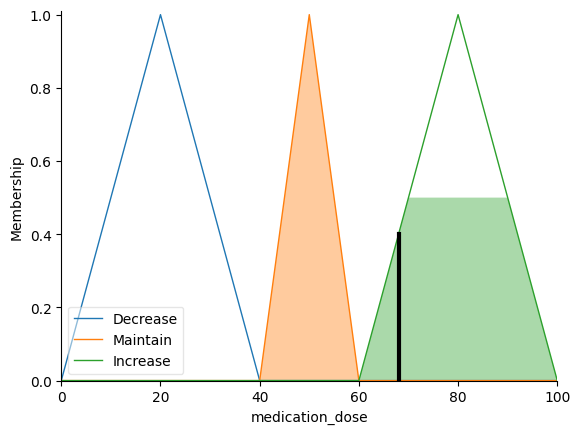

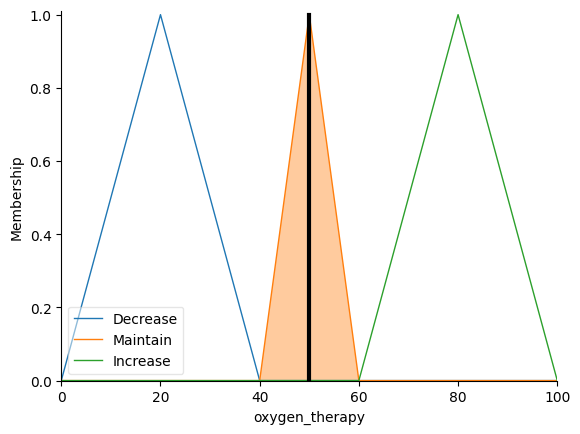

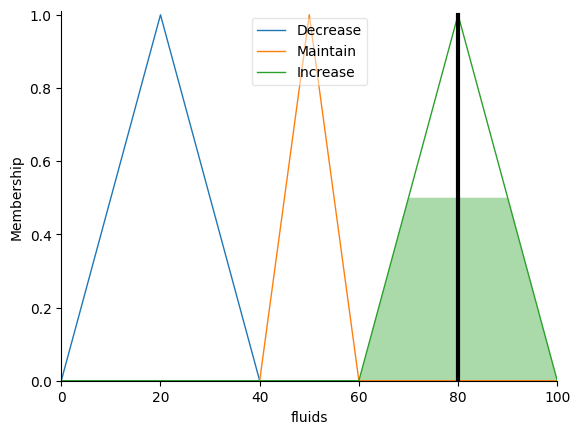

In [7]:
#bài2.8
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl


heart_rate = ctrl.Antecedent(np.arange(40, 161, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(60, 181, 1), 'blood_pressure')
body_temp = ctrl.Antecedent(np.arange(34, 41, 0.1), 'body_temp')
oxygen_saturation = ctrl.Antecedent(np.arange(85, 101, 1), 'oxygen_saturation')
blood_sugar = ctrl.Antecedent(np.arange(50, 201, 1), 'blood_sugar')

medication_dose = ctrl.Consequent(np.arange(0, 101, 1), 'medication_dose')
fluids = ctrl.Consequent(np.arange(0, 101, 1), 'fluids')
oxygen_therapy = ctrl.Consequent(np.arange(0, 101, 1), 'oxygen_therapy')

heart_rate['Low'] = fuzz.trimf(heart_rate.universe, [40, 50, 60])
heart_rate['Normal'] = fuzz.trimf(heart_rate.universe, [60, 80, 100])
heart_rate['High'] = fuzz.trimf(heart_rate.universe, [100, 120, 160])

blood_pressure['Low'] = fuzz.trimf(blood_pressure.universe, [60, 75, 90])
blood_pressure['Normal'] = fuzz.trimf(blood_pressure.universe, [90, 110, 130])
blood_pressure['High'] = fuzz.trimf(blood_pressure.universe, [130, 150, 180])

body_temp['Low'] = fuzz.trimf(body_temp.universe, [34, 35, 36])
body_temp['Normal'] = fuzz.trimf(body_temp.universe, [36, 37, 38])
body_temp['High'] = fuzz.trimf(body_temp.universe, [38, 39, 40])

oxygen_saturation['Low'] = fuzz.trimf(oxygen_saturation.universe, [85, 87, 90])
oxygen_saturation['Normal'] = fuzz.trimf(oxygen_saturation.universe, [90, 95, 100])

blood_sugar['Low'] = fuzz.trimf(blood_sugar.universe, [50, 60, 70])
blood_sugar['Normal'] = fuzz.trimf(blood_sugar.universe, [70, 110, 140])
blood_sugar['High'] = fuzz.trimf(blood_sugar.universe, [140, 160, 200])

medication_dose['Decrease'] = fuzz.trimf(medication_dose.universe, [0, 20, 40])
medication_dose['Maintain'] = fuzz.trimf(medication_dose.universe, [40, 50, 60])
medication_dose['Increase'] = fuzz.trimf(medication_dose.universe, [60, 80, 100])

fluids['Decrease'] = fuzz.trimf(fluids.universe, [0, 20, 40])
fluids['Maintain'] = fuzz.trimf(fluids.universe, [40, 50, 60])
fluids['Increase'] = fuzz.trimf(fluids.universe, [60, 80, 100])

oxygen_therapy['Decrease'] = fuzz.trimf(oxygen_therapy.universe, [0, 20, 40])
oxygen_therapy['Maintain'] = fuzz.trimf(oxygen_therapy.universe, [40, 50, 60])
oxygen_therapy['Increase'] = fuzz.trimf(oxygen_therapy.universe, [60, 80, 100])

rule1 = ctrl.Rule(heart_rate['Low'] & blood_pressure['Low'],
                  (medication_dose['Increase'], fluids['Increase']))
rule2 = ctrl.Rule(heart_rate['High'] & blood_pressure['High'],
                  medication_dose['Decrease'])
rule3 = ctrl.Rule(heart_rate['Normal'] & blood_pressure['Normal'],
                  medication_dose['Maintain'])
rule4 = ctrl.Rule(body_temp['High'] & oxygen_saturation['Low'],
                  (oxygen_therapy['Increase'], medication_dose['Increase']))
rule5 = ctrl.Rule(body_temp['Normal'] & oxygen_saturation['Normal'],
                  (oxygen_therapy['Maintain'], medication_dose['Maintain']))
rule6 = ctrl.Rule(body_temp['Low'] & oxygen_saturation['Low'],
                  (oxygen_therapy['Increase'], fluids['Increase']))
rule7 = ctrl.Rule(blood_sugar['High'], medication_dose['Increase'])
rule8 = ctrl.Rule(blood_sugar['Low'], medication_dose['Decrease'])
rule9 = ctrl.Rule(blood_sugar['Normal'], medication_dose['Maintain'])
rule10 = ctrl.Rule(blood_pressure['High'] & blood_sugar['High'] & heart_rate['High'],
                   medication_dose['Decrease'])
rule11 = ctrl.Rule(blood_pressure['Low'] & oxygen_saturation['Low'] & heart_rate['Low'],
                   (fluids['Increase'], oxygen_therapy['Increase'], medication_dose['Increase']))
rule12 = ctrl.Rule(body_temp['High'] & blood_pressure['High'] & oxygen_saturation['Normal'],
                   medication_dose['Increase'])

patient_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,
                                   rule9, rule10, rule11, rule12])
patient= ctrl.ControlSystemSimulation(patient_ctrl)

patient.input['heart_rate'] = 55
patient.input['blood_pressure'] = 70
patient.input['body_temp'] = 37
patient.input['oxygen_saturation'] = 95
patient.input['blood_sugar'] = 1



patient.compute()


print(f"Medication Dose: {patient.output['medication_dose']:.2f}")
print(f"Oxygen Therapy: {patient.output['oxygen_therapy']:.2f}")
print(f"Fluids: {patient.output['fluids']:.2f}")

medication_dose.view(sim=patient)
oxygen_therapy.view(sim=patient)
fluids.view(sim=patient)

Review Classification Score: 0.31


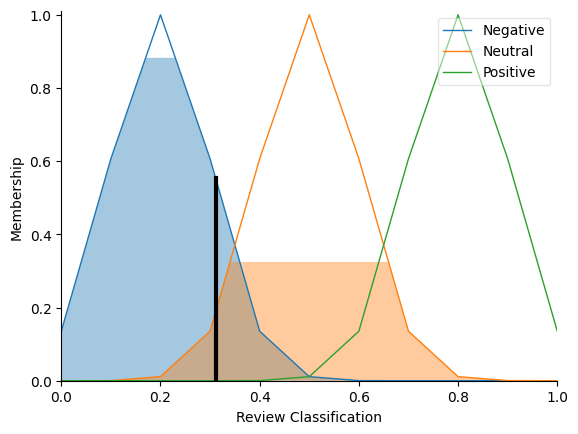

In [9]:
#bài2.9
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Sentiment Score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Emotion Intensity')
positive_words = ctrl.Antecedent(np.arange(0, 7, 1), 'Positive Words')
negative_words = ctrl.Antecedent(np.arange(0, 7, 1), 'Negative Words')
review_classification = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Review Classification')

sentiment_score['Negative'] = fuzz.gaussmf(sentiment_score.universe, 0.15, 0.1)
sentiment_score['Neutral'] = fuzz.gaussmf(sentiment_score.universe, 0.5, 0.2)
sentiment_score['Positive'] = fuzz.gaussmf(sentiment_score.universe, 0.85, 0.1)

emotion_intensity['Low'] = fuzz.gaussmf(emotion_intensity.universe, 0.2, 0.1)
emotion_intensity['Medium'] = fuzz.gaussmf(emotion_intensity.universe, 0.6, 0.2)
emotion_intensity['High'] = fuzz.gaussmf(emotion_intensity.universe, 0.9, 0.1)

positive_words['Few'] = fuzz.gaussmf(positive_words.universe, 1, 1)
positive_words['Some'] = fuzz.gaussmf(positive_words.universe, 3, 1)
positive_words['Many'] = fuzz.gaussmf(positive_words.universe, 6, 1)

negative_words['Few'] = fuzz.gaussmf(negative_words.universe, 1, 1)
negative_words['Some'] = fuzz.gaussmf(negative_words.universe, 3, 1)
negative_words['Many'] = fuzz.gaussmf(negative_words.universe, 6, 1)

review_classification['Negative'] = fuzz.gaussmf(review_classification.universe, 0.2, 0.1)
review_classification['Neutral'] = fuzz.gaussmf(review_classification.universe, 0.5, 0.1)
review_classification['Positive'] = fuzz.gaussmf(review_classification.universe, 0.8, 0.1)

rule1 = ctrl.Rule(sentiment_score['Negative'] & emotion_intensity['High'], review_classification['Negative'])
rule2 = ctrl.Rule(sentiment_score['Negative'] & emotion_intensity['Low'], review_classification['Neutral'])
rule3 = ctrl.Rule(sentiment_score['Neutral'] & emotion_intensity['Medium'], review_classification['Neutral'])
rule4 = ctrl.Rule(sentiment_score['Positive'] & emotion_intensity['High'], review_classification['Positive'])
rule5 = ctrl.Rule(positive_words['Many'] & negative_words['Few'], review_classification['Positive'])
rule6 = ctrl.Rule(positive_words['Few'] & negative_words['Many'], review_classification['Negative'])
rule7 = ctrl.Rule(positive_words['Some'] & negative_words['Some'], review_classification['Neutral'])
rule8 = ctrl.Rule(sentiment_score['Negative'] & negative_words['Many'] & emotion_intensity['High'], review_classification['Negative'])
rule9 = ctrl.Rule(sentiment_score['Neutral'] & emotion_intensity['Medium'] & positive_words['Some'], review_classification['Neutral'])
rule10 = ctrl.Rule(sentiment_score['Positive'] & positive_words['Many'] & emotion_intensity['High'], review_classification['Positive'])


review_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
review = ctrl.ControlSystemSimulation(review_ctrl)

review.input['Sentiment Score'] = 0.2
review.input['Emotion Intensity'] = 0.9
review.input['Positive Words'] = 1
review.input['Negative Words'] = 5

review.compute()
print(f"Review Classification Score: {review.output['Review Classification']:.2f}")
review_classification.view(sim=review)


Estimated Delivery Time: 16.97 minutes
Incentive Bonus: 0.71
Driver Performance Rating: 2.95


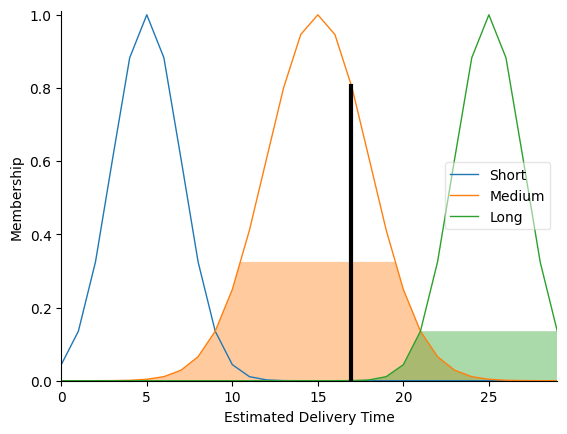

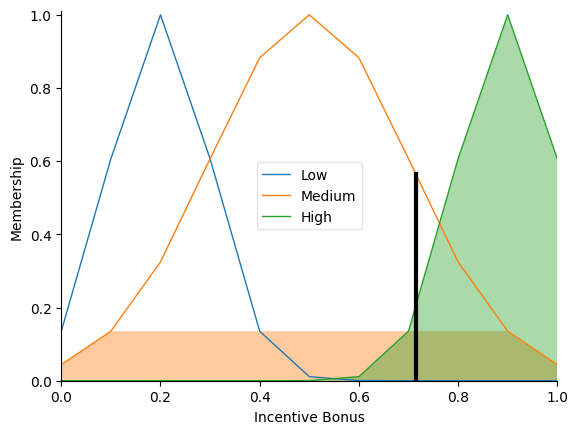

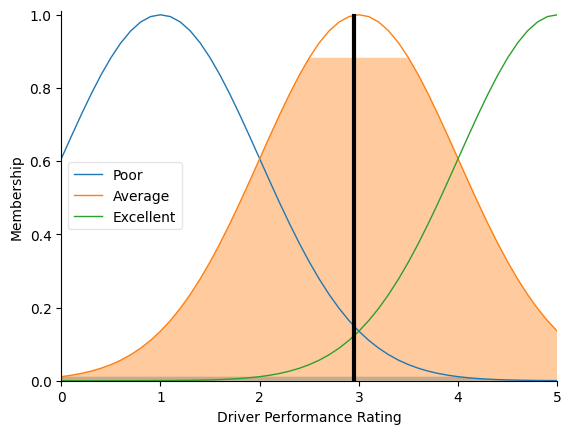

In [11]:
#bài2.10
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl


traffic_condition = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Traffic Condition')
distance_to_customer = ctrl.Antecedent(np.arange(0, 10, 1), 'Distance to Customer')
weather_condition = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Weather Condition')
order_prep_time = ctrl.Antecedent(np.arange(0, 20, 1), 'Order Preparation Time')
driver_fatigue = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Driver Fatigue Level')

delivery_time = ctrl.Consequent(np.arange(0, 30, 1), 'Estimated Delivery Time')
incentive_bonus = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Incentive Bonus')
driver_performance = ctrl.Consequent(np.arange(0, 5.1, 0.1), 'Driver Performance Rating')

traffic_condition['Low'] = fuzz.gaussmf(traffic_condition.universe, 0.2, 0.1)
traffic_condition['Medium'] = fuzz.gaussmf(traffic_condition.universe, 0.5, 0.2)
traffic_condition['High'] = fuzz.gaussmf(traffic_condition.universe, 0.9, 0.1)

distance_to_customer['Short'] = fuzz.gaussmf(distance_to_customer.universe, 1, 1)
distance_to_customer['Medium'] = fuzz.gaussmf(distance_to_customer.universe, 5, 1)
distance_to_customer['Long'] = fuzz.gaussmf(distance_to_customer.universe, 9, 1)

weather_condition['Clear'] = fuzz.gaussmf(weather_condition.universe, 0.2, 0.1)
weather_condition['Rainy'] = fuzz.gaussmf(weather_condition.universe, 0.5, 0.2)
weather_condition['Stormy'] = fuzz.gaussmf(weather_condition.universe, 0.9, 0.1)

order_prep_time['Fast'] = fuzz.gaussmf(order_prep_time.universe, 3, 1)
order_prep_time['Medium'] = fuzz.gaussmf(order_prep_time.universe, 10, 2)
order_prep_time['Slow'] = fuzz.gaussmf(order_prep_time.universe, 18, 1)

driver_fatigue['Low'] = fuzz.gaussmf(driver_fatigue.universe, 0.2, 0.1)
driver_fatigue['Medium'] = fuzz.gaussmf(driver_fatigue.universe, 0.5, 0.2)
driver_fatigue['High'] = fuzz.gaussmf(driver_fatigue.universe, 0.9, 0.1)

delivery_time['Short'] = fuzz.gaussmf(delivery_time.universe, 5, 2)
delivery_time['Medium'] = fuzz.gaussmf(delivery_time.universe, 15, 3)
delivery_time['Long'] = fuzz.gaussmf(delivery_time.universe, 25, 2)

incentive_bonus['Low'] = fuzz.gaussmf(incentive_bonus.universe, 0.2, 0.1)
incentive_bonus['Medium'] = fuzz.gaussmf(incentive_bonus.universe, 0.5, 0.2)
incentive_bonus['High'] = fuzz.gaussmf(incentive_bonus.universe, 0.9, 0.1)

driver_performance['Poor'] = fuzz.gaussmf(driver_performance.universe, 1, 1)
driver_performance['Average'] = fuzz.gaussmf(driver_performance.universe, 3, 1)
driver_performance['Excellent'] = fuzz.gaussmf(driver_performance.universe, 5, 1)

rule1 = ctrl.Rule(traffic_condition['Low'] & distance_to_customer['Short'], delivery_time['Short'])
rule2 = ctrl.Rule(traffic_condition['Medium'] & distance_to_customer['Medium'], delivery_time['Medium'])
rule3 = ctrl.Rule(traffic_condition['High'] & distance_to_customer['Long'], delivery_time['Long'])

rule4 = ctrl.Rule(weather_condition['Clear'], incentive_bonus['Low'])
rule5 = ctrl.Rule(weather_condition['Rainy'], incentive_bonus['Medium'])
rule6 = ctrl.Rule(weather_condition['Stormy'], incentive_bonus['High'])

rule7 = ctrl.Rule(order_prep_time['Fast'] & traffic_condition['Low'], delivery_time['Short'])
rule8 = ctrl.Rule(order_prep_time['Medium'] & traffic_condition['Medium'], delivery_time['Medium'])
rule9 = ctrl.Rule(order_prep_time['Slow'] & traffic_condition['High'], delivery_time['Long'])

rule10 = ctrl.Rule(driver_fatigue['Low'], driver_performance['Excellent'])
rule11 = ctrl.Rule(driver_fatigue['Medium'], driver_performance['Average'])
rule12 = ctrl.Rule(driver_fatigue['High'], driver_performance['Poor'])

rule13 = ctrl.Rule(distance_to_customer['Long'] & weather_condition['Stormy'] & traffic_condition['High'], delivery_time['Long'], incentive_bonus['High'])
rule14 = ctrl.Rule(distance_to_customer['Short'] & weather_condition['Clear'] & traffic_condition['Low'], delivery_time['Short'], incentive_bonus['Low'])
rule15 = ctrl.Rule(driver_fatigue['High'] & traffic_condition['High'], driver_performance['Poor'], delivery_time['Long'])


delivery_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
delivering= ctrl.ControlSystemSimulation(delivery_ctrl)

delivering.input['Traffic Condition'] = 0.8
delivering.input['Distance to Customer'] = 7
delivering.input['Weather Condition'] = 0.9
delivering.input['Order Preparation Time'] = 12
delivering.input['Driver Fatigue Level'] = 0.6

delivering.compute()
print(f"Estimated Delivery Time: {delivering.output['Estimated Delivery Time']:.2f} minutes")
print(f"Incentive Bonus: {delivering.output['Incentive Bonus']:.2f}")
print(f"Driver Performance Rating: {delivering.output['Driver Performance Rating']:.2f}")

delivery_time.view(sim=delivering)
incentive_bonus.view(sim=delivering)
driver_performance.view(sim=delivering)


Final Price: 0.92


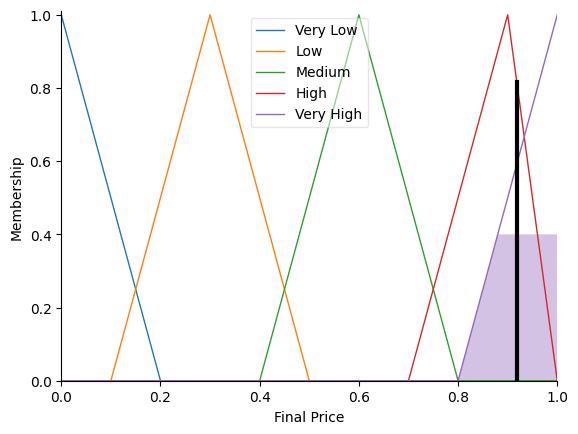

In [10]:
#bài 2.11
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl


demand = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Market Demand')
competitor_price = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Competitor Price')
production_cost = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Production Cost')
seasonality = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Seasonality')
inventory_level = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Inventory Level')

final_price = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Final Price')


demand['Low'] = fuzz.trimf(demand.universe, [0, 0, 0.5])
demand['Medium'] = fuzz.trimf(demand.universe, [0.25, 0.5, 0.75])
demand['High'] = fuzz.trimf(demand.universe, [0.5, 1, 1])

competitor_price['Low'] = fuzz.trimf(competitor_price.universe, [0, 0, 0.5])
competitor_price['Medium'] = fuzz.trimf(competitor_price.universe, [0.25, 0.5, 0.75])
competitor_price['High'] = fuzz.trimf(competitor_price.universe, [0.5, 1, 1])

production_cost['Low'] = fuzz.trimf(production_cost.universe, [0, 0, 0.5])
production_cost['Medium'] = fuzz.trimf(production_cost.universe, [0.25, 0.5, 0.75])
production_cost['High'] = fuzz.trimf(production_cost.universe, [0.5, 1, 1])

seasonality['Off-Peak'] = fuzz.trimf(seasonality.universe, [0, 0, 0.5])
seasonality['Normal'] = fuzz.trimf(seasonality.universe, [0.25, 0.5, 0.75])
seasonality['Peak'] = fuzz.trimf(seasonality.universe, [0.5, 1, 1])

inventory_level['Low'] = fuzz.trimf(inventory_level.universe, [0, 0, 0.5])
inventory_level['Medium'] = fuzz.trimf(inventory_level.universe, [0.25, 0.5, 0.75])
inventory_level['High'] = fuzz.trimf(inventory_level.universe, [0.5, 1, 1])

final_price['Very Low'] = fuzz.trimf(final_price.universe, [0, 0, 0.2])
final_price['Low'] = fuzz.trimf(final_price.universe, [0.1, 0.3, 0.5])
final_price['Medium'] = fuzz.trimf(final_price.universe, [0.4, 0.6, 0.8])
final_price['High'] = fuzz.trimf(final_price.universe, [0.7, 0.9, 1])
final_price['Very High'] = fuzz.trimf(final_price.universe, [0.8, 1, 1])

# Define fuzzy rules
rule1 = ctrl.Rule(demand['High'] & competitor_price['High'] & inventory_level['Low'], final_price['Very High'])
rule2 = ctrl.Rule(demand['High'] & seasonality['Peak'] & inventory_level['Low'], final_price['Very High'])
rule3 = ctrl.Rule(demand['Medium'] & production_cost['High'] & inventory_level['Low'], final_price['Very High'])

rule4 = ctrl.Rule(demand['High'] & competitor_price['Medium'] & inventory_level['Medium'], final_price['High'])
rule5 = ctrl.Rule(demand['Medium'] & competitor_price['High'] & inventory_level['Low'], final_price['High'])
rule6 = ctrl.Rule(demand['Medium'] & seasonality['Peak'] & inventory_level['Medium'], final_price['High'])

rule7 = ctrl.Rule(demand['Medium'] & competitor_price['Medium'] & inventory_level['Medium'], final_price['Medium'])
rule8 = ctrl.Rule(demand['Medium'] & competitor_price['High'] & inventory_level['Medium'], final_price['Medium'])
rule9 = ctrl.Rule(demand['Low'] & competitor_price['High'] & inventory_level['Medium'], final_price['Medium'])
rule10 = ctrl.Rule(demand['Medium'] & production_cost['Medium'] & inventory_level['Medium'], final_price['Medium'])

rule11 = ctrl.Rule(demand['Low'] & competitor_price['Low'] & inventory_level['High'], final_price['Low'])
rule12 = ctrl.Rule(demand['Medium'] & production_cost['Medium'] & inventory_level['High'], final_price['Low'])
rule13 = ctrl.Rule(demand['Low'] & seasonality['Off-Peak'] & inventory_level['High'], final_price['Low'])

rule14 = ctrl.Rule(demand['Low'] & competitor_price['Low'] & inventory_level['High'], final_price['Very Low'])
rule15 = ctrl.Rule(demand['Low'] & seasonality['Off-Peak'] & inventory_level['High'], final_price['Very Low'])
rule16 = ctrl.Rule(demand['Medium'] & competitor_price['Low'] & inventory_level['High'], final_price['Very Low'])

# Control system
pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
pricing = ctrl.ControlSystemSimulation(pricing_ctrl)

# Example input
pricing.input['Market Demand'] = 0.8
pricing.input['Competitor Price'] = 0.9
pricing.input['Production Cost'] = 0.6
pricing.input['Seasonality'] = 0.7
pricing.input['Inventory Level'] = 0.3

# Compute output
pricing.compute()
print(f"Final Price: {pricing.output['Final Price']:.2f}") # Changed 'final_prize' to 'Final Price'
final_price.view(sim=pricing) # Changed 'final_prize' to 'final_price'